In [1]:
# from dask_image.imread import imread
import matplotlib.pyplot as plt
import pims
# import btrack
import trackpy as tp
import numpy as np
import pandas as pd
# import napari
import skimage
from skimage.measure import label, regionprops, regionprops_table
from datetime import timedelta

import time
def update_slider(event):
    import time
    from datetime import timedelta
    # only trigger if update comes from first axis (optional)
#     print('inside')
        #ind_lambda = viewer.dims.indices[0]
    ind_lambda = v.dims.current_step[0]
    # timestrg = "Day: {0}".format(time.strftime('%d %H:%M:%S',time.gmtime(timelist[ind_lambda])))
    timestrg = "{0}".format(timedelta(seconds=timelist[ind_lambda]))
    v.text_overlay.text = timestrg


def make_labels_trackpy_links(image,j,size=5,_round=False):
    import trackpy as tp
    import scipy.ndimage as ndi
    from scipy.ndimage import binary_dilation


    #outputsomehow is 3D, we want 2
    coords = np.dstack((round(j.y),round(j.x)))[0].astype(int)

    #this is super slow
    # ~ masks = tp.masks.mask_image(coords,np.ones(image.shape),size/2)

    #This is faster
    r = (size-1)/2 # Radius of circles
    #make 3D compat
    disk_mask = tp.masks.binary_mask(r,image.ndim)
    # Initialize output array and set the maskcenters as 1s
    out = np.zeros(image.shape,dtype=bool)
    #check if there's a problem with subpixel masking
    out[coords[:,0],coords[:,1]] = 1
    # Use binary dilation to get the desired output
    out = binary_dilation(out,disk_mask)


    labels, nb = ndi.label(out)
    if _round:
        return labels, coords
    else:
        if image.ndim == 2:
            coords = j.loc[:,['particle','frame','y','x']]
#             coords = np.dstack((j.particle,j.y,j.x))[0]
            return labels, coords
#     return labels, coords

def make_masks(positions,r=3,ndims=2):
    import trackpy as tp
    if ndims == 2:
        r = (size-1)/2 # Radius of circles
        #make 3D compat
        disk_mask = tp.masks.binary_mask(r,np.zeros(ndim))
        # Initialize output array and set the maskcenters as 1s
        out = np.zeros(image.shape,dtype=bool)
        #check if there's a problem with subpixel masking
        out[coords[:,0],coords[:,1]] = 1
        # Use binary dilation to get the desired output
        out = binary_dilation(out,disk_mask)
        labels, nb = ndi.label(out)

        if _round:
            return labels, coords
        else:
            if image.ndim == 2:
                coords = np.dstack((f.y,f.x))[0]
                return labels, coords
    elif image.ndim == 3:
            coords = np.dstack((f.z,f.y,f.x))[0]
            return None, coords


In [6]:
filelist = ['/home/jmamede/Data/centered/HOS/Stephanie_2022_HOS-Lamin_20220426HOSL3_ROI_n1_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_Hos-Lamin_20220726HOSL3_ROI_n14_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_Hos-Lamin_20220825HOSL3_ROI_n2_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_HOS-Lamin_20220511HOSL3_ROI_n2_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_Hos-Lamin_20220825HOSL3_ROI_n3_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_Hos-Lamin_20220726HOSL3_ROI_n17_centered_CARE.ome.tif',
 '/home/jmamede/Data/centered/HOS/Stephanie_2022_Hos-Lamin_20220726HOSL3_ROI_n11_centered_CARE.ome.tif']
_fname = filelist[1]
reader = pims.Bioformats(_fname)
_shape = reader.sizes
for i in range(reader.metadata.ChannelCount(0)):
    print(reader.metadata.ChannelName(0,i))

size_z = _shape['z'] 
size_c = _shape['c']
reader.bundle_axes = 'zyx'
reader.iter_axes = 't'
reader.default_coords['c'] = 1
# frames = reader
metadata = reader.metadata
# metadata
metadata.PlaneDeltaT(0,0)
timelist = []
for i in range(metadata.PlaneCount(0)):
    timelist.append(metadata.PlaneDeltaT(0,i))

timelist = np.asarray(timelist)
#this slicing was for PRj, adapt to Zstacks
timelist = timelist.reshape((metadata.PlaneCount(0)//metadata.ChannelCount(0),metadata.ChannelCount(0)))
timelist = timelist.reshape((metadata.PlaneCount(0)//metadata.ChannelCount(0)//metadata.PixelsSizeZ(0),metadata.PixelsSizeZ(0),metadata.ChannelCount(0)))
print(timelist.shape)
timelist = timelist[:,0,0]
# del(metadata)


FITC
TRITC
mirfp670
(102, 16, 3)


/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pims/bioformats.py:410: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


In [7]:
timelist.shape

(102,)

Frame([[[5529, 5522, 5532, ..., 5528, 5542, 5543],
        [5510, 5532, 5513, ..., 5518, 5535, 5556],
        [5518, 5525, 5519, ..., 5544, 5539, 5527],
        ...,
        [5548, 5522, 5544, ..., 5615, 5595, 5611],
        [5520, 5513, 5519, ..., 5575, 5617, 5610],
        [5539, 5541, 5538, ..., 5571, 5591, 5606]],

       [[5464, 5470, 5465, ..., 5548, 5549, 5547],
        [5470, 5468, 5454, ..., 5515, 5538, 5551],
        [5455, 5454, 5448, ..., 5538, 5546, 5520],
        ...,
        [5522, 5499, 5522, ..., 5635, 5608, 5653],
        [5501, 5502, 5509, ..., 5581, 5629, 5627],
        [5532, 5539, 5540, ..., 5589, 5608, 5635]],

       [[5496, 5498, 5504, ..., 5590, 5571, 5570],
        [5498, 5500, 5485, ..., 5552, 5579, 5586],
        [5482, 5487, 5481, ..., 5569, 5585, 5548],
        ...,
        [5535, 5500, 5537, ..., 5665, 5634, 5670],
        [5534, 5508, 5512, ..., 5613, 5650, 5656],
        [5542, 5538, 5543, ..., 5615, 5630, 5662]],

       ...,

       [[5449, 5458, 5422, ..., 5443, 5450, 5452],
        [5438, 5441, 5448, ..., 5434, 5435, 5424],
        [5421, 5409, 5440, ..., 5442, 5456, 5422],
        ...,
        [5494, 5445, 5482, ..., 5434, 5434, 5399],
        [5491, 5443, 5462, ..., 5420, 5403, 5437],
        [5484, 5469, 5448, ..., 5408, 5416, 5442]],

       [[5468, 5472, 5445, ..., 5480, 5491, 5473],
        [5462, 5459, 5471, ..., 5485, 5466, 5450],
        [5429, 5435, 5463, ..., 5431, 5471, 5457],
        ...,
        [5499, 5477, 5486, ..., 5488, 5495, 5460],
        [5503, 5458, 5481, ..., 5475, 5454, 5485],
        [5493, 5491, 5469, ..., 5452, 5462, 5488]],

       [[5488, 5494, 5465, ..., 5454, 5511, 5504],
        [5498, 5490, 5495, ..., 5483, 5488, 5485],
        [5488, 5489, 5482, ..., 5493, 5509, 5484],
        ...,
        [5498, 5492, 5530, ..., 5530, 5531, 5490],
        [5518, 5466, 5493, ..., 5510, 5492, 5513],
        [5516, 5508, 5474, ..., 5481, 5503, 5516]]], dtype=uint16)
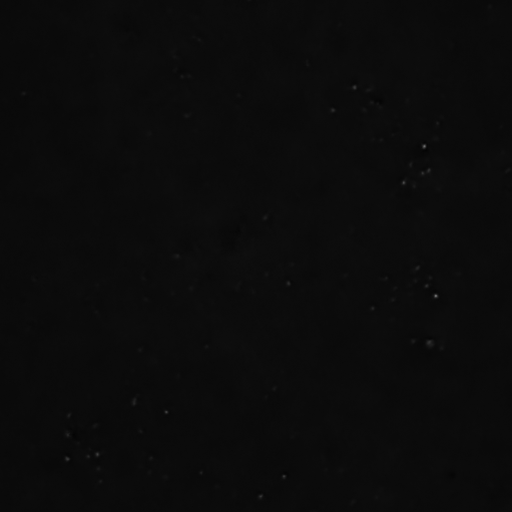
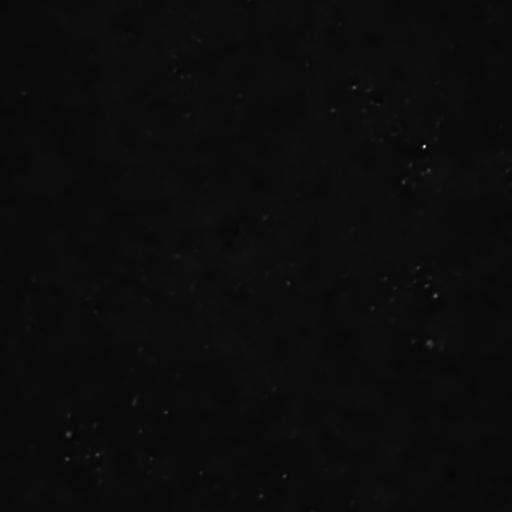
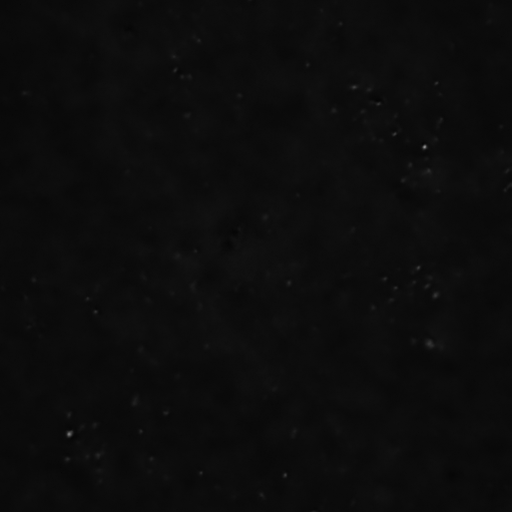
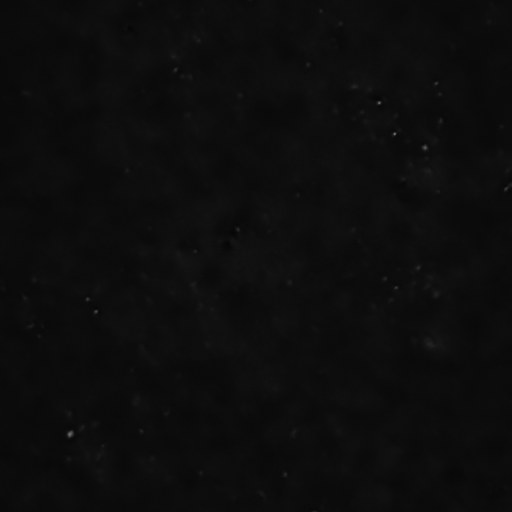
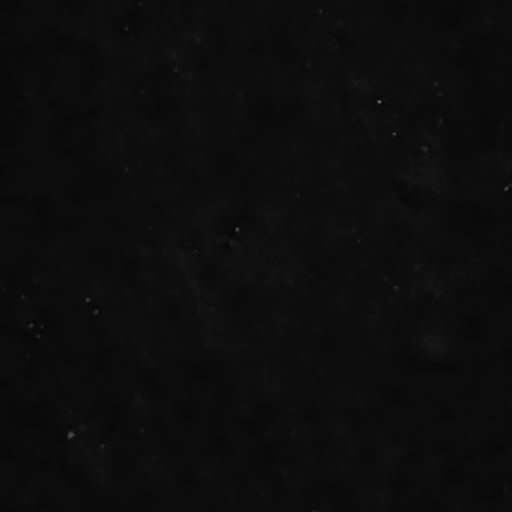
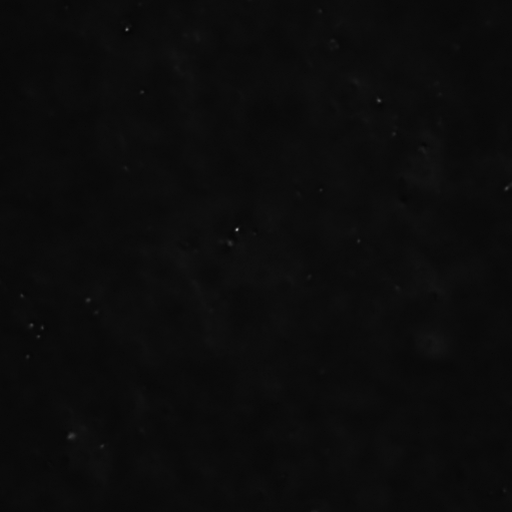
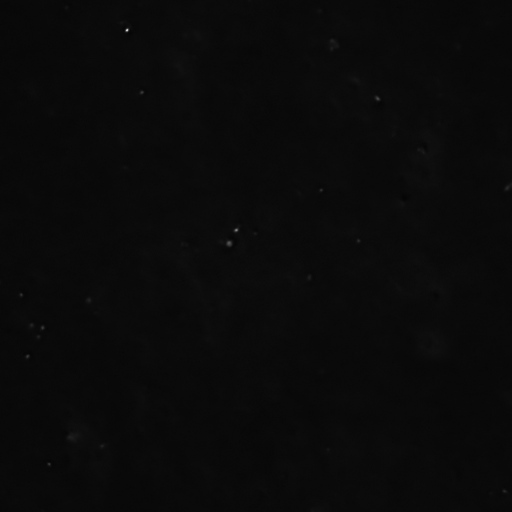
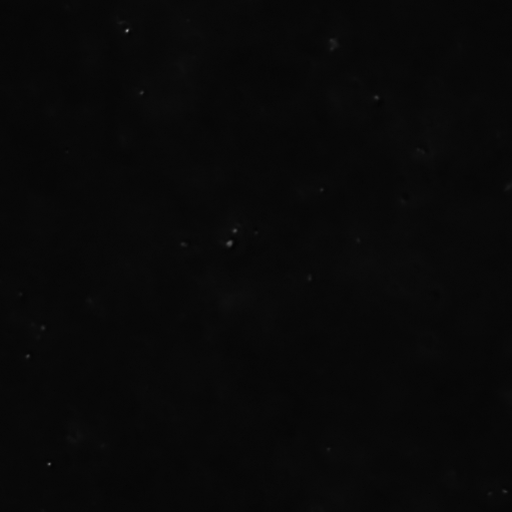
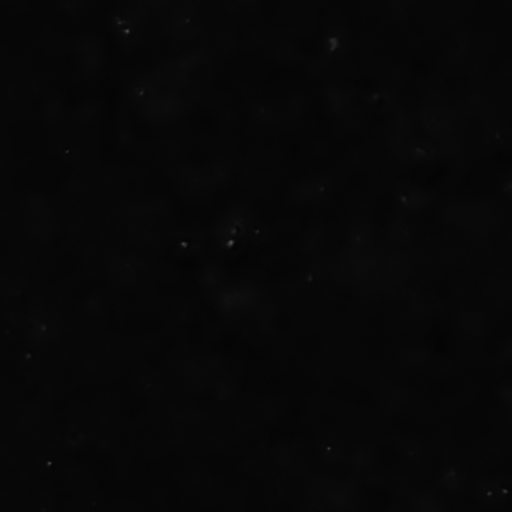
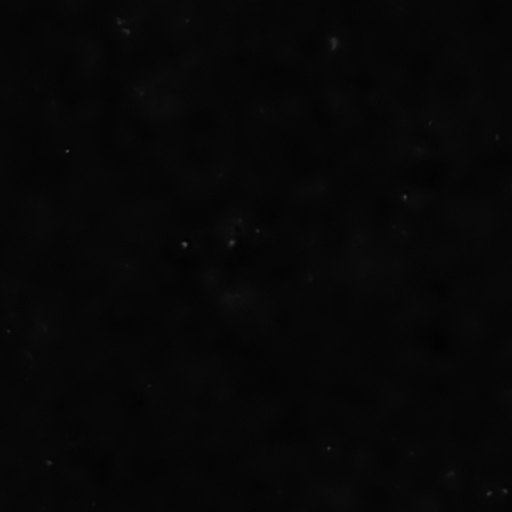
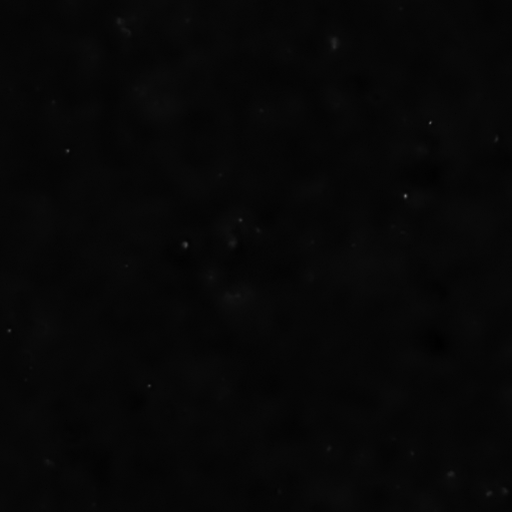
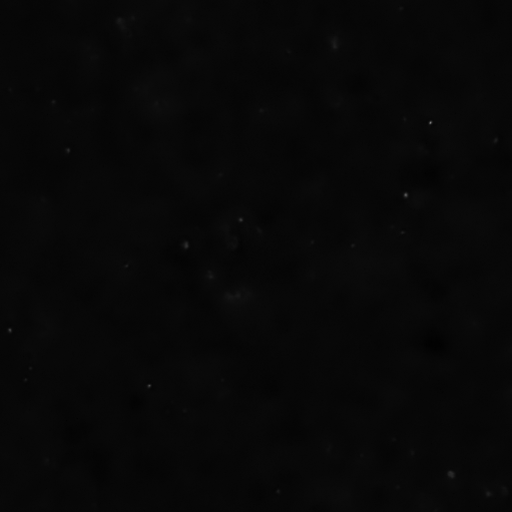
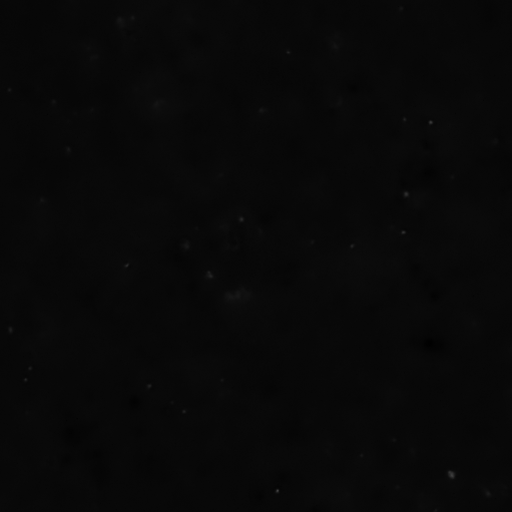
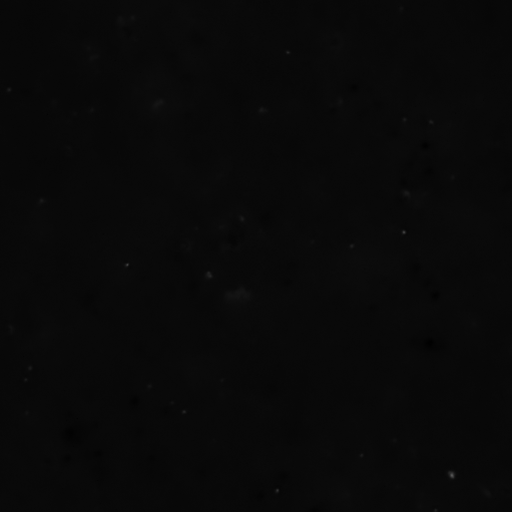
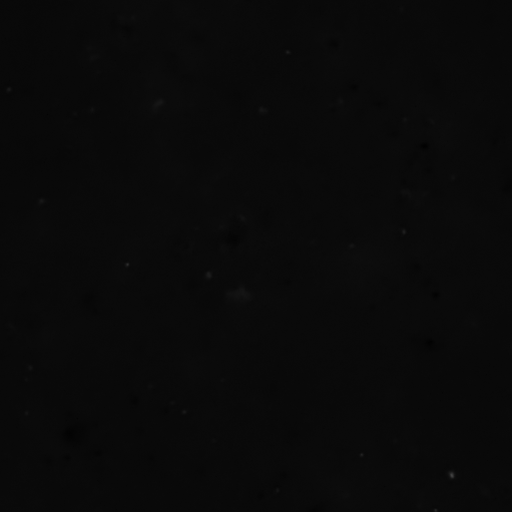
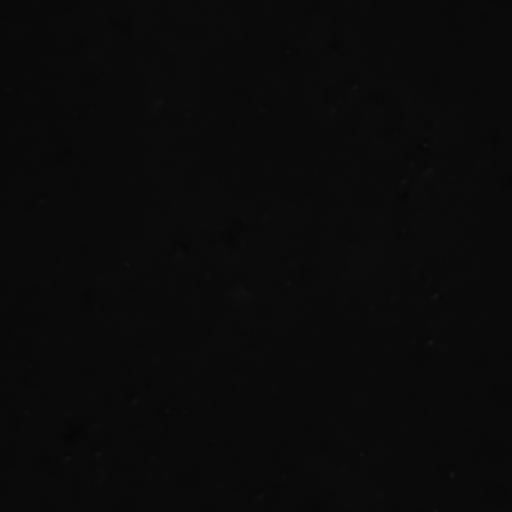

In [8]:
reader[25]
# reader.close()

In [9]:
reader.bundle_axes = 'zyx'
reader.default_coords['c'] = 1

# reader.default_coords['c'] = 2
# green = np.array(reader[:])
# reader.default_coords['c'] = 0
# blue = np.array(reader[:])
# a.shape

In [10]:
a = np.array(reader[:])
a.shape

(102, 16, 513, 513)

In [11]:
_mass = 1500
_diam = (3,9,9)
# reader.default_coords['c'] = 1
f = tp.batch(
#     reader[:],
    a,
    (3,9,9),minmass=_mass,
            #  engine='python',
             engine='numba',
            )
# tp.subpx_bias(f)
# plt.hist(f['mass'], bins=20)

# f = f[((f['mass'] > _mass) & (f['size'] < 2.25) & (f['mass'] < 4e6)
#              &          (f['ecc'] < 0.5)
#             )
#            ]

# f = f[(f['signal'] > 1800) & 
#         (f['size_y'] < 2.45) & 
#         (f['size_x'] < 2.45)]
f2 = f[(f['signal'] > 150) &
        (f['size_y'] < 2.45) &
        (f['size_x'] < 2.45)]


Frame 101: 167 features


In [12]:
f

z           y           x         mass    size_z    size_y  \
0      2.059528  104.668128  450.783137  2829.019919  0.422591  2.144682   
1      2.069898  216.938430  133.018434  2549.218877  0.457924  1.785283   
2      2.056609  261.105153  155.146524  6152.044919  0.502871  1.978070   
3      2.049101  260.469093  387.931828  2176.389354  0.383802  2.157133   
4      2.071863  262.455085  257.067409  3213.060566  0.464317  2.317456   
...         ...         ...         ...          ...       ...       ...   
24369       NaN         NaN         NaN          NaN       NaN       NaN   
24370       NaN         NaN         NaN          NaN       NaN       NaN   
24371       NaN         NaN         NaN          NaN       NaN       NaN   
24372       NaN         NaN         NaN          NaN       NaN       NaN   
24373       NaN         NaN         NaN          NaN       NaN       NaN   

         size_x  ecc      signal  raw_mass      ep_z      ep_y      ep_x  \
0      2.045931  NaN  208.479208  306678.0  0.007622  0.074680  0.074680   
1      1.748985  NaN  254.516379  305435.0  0.011291  0.110626  0.110626   
2      2.352673  NaN  436.518251  315931.0  0.007910  0.077502  0.077502   
3      2.212366  NaN  165.542987  299217.0  0.007328  0.071797  0.071797   
4      1.849457  NaN  250.938360  305842.0  0.007679  0.075237  0.075237   
...         ...  ...         ...       ...       ...       ...       ...   
24369       NaN  NaN         NaN       NaN  0.003001  0.029402  0.029402   
24370       NaN  NaN         NaN       NaN  0.017314  0.169638  0.169638   
24371       NaN  NaN         NaN       NaN  0.003067  0.030055  0.030055   
24372       NaN  NaN         NaN       NaN  0.010023  0.098202  0.098202   
24373       NaN  NaN         NaN       NaN  0.002009  0.019686  0.019686   

       frame  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
24369    101  
24370    101  
24371    101  
24372    101  
24373    101  

[24374 rows x 14 columns]

In [13]:

import pathlib
path = pathlib.PurePath(_fname)
_fname_points = str(path.parents[0])+'/'+str(path.name).strip('.ome.tif')+'_points_CARE.csv'
f2.to_csv(_fname_points)


array([[<AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >]],
      dtype=object)

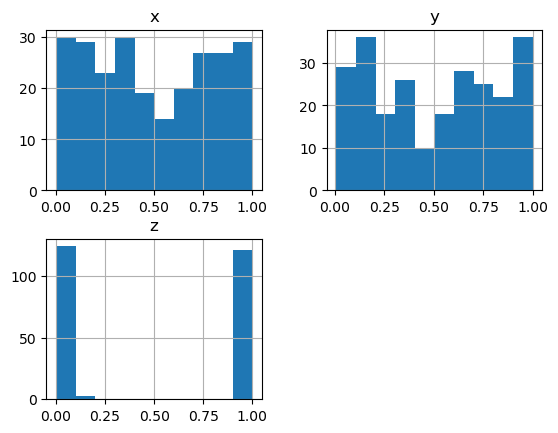

In [6]:
reader.bundle_axes = 'zyx'
reader.default_coords['c'] = 1
i = 2
# _mass = 100000
_mass = 1500
_diam = (3,9,9)
# _diam = 9
f = tp.locate(reader[i], _diam,minmass=_mass)
tp.subpx_bias(f)

In [7]:
# df_all['ID'] = df_all.index
# nuclei_spots =  df_all.loc[:,['t','y','x']]
# .to_numpy()
# points = 
import napari
v = napari.Viewer()
reader.default_coords['c'] = 1
v.add_image(reader[i],
colormap='red',
blending='additive',
# scale=(0.5,0.220,0.220)
)
reader.default_coords['c'] = 0
v.add_image(reader[i],
            colormap='green',
            blending='additive',
# scale=(0.5,0.220,0.220)
)

# _points = f.loc[:,['frame','y','x']]
# _metadata = f.loc[:,['mass','size','ecc']]
_points = f.loc[:,['z','y','x']]
_metadata = f.loc[:,['mass','size_x','size_y','size_z','ecc','signal','ecc']]
# _metadata = f.loc[:,['mass','size','signal','ecc']]
points_options = dict(face_color=[0]*4,edge_color='red',opacity=0.2,size=10)
v.add_points(_points,properties=_metadata, **points_options )
# nuclei_spots =  df_all.loc[:,['t','y','x']]
# v.add_tracks(links.loc[:,['particle','frame','y','x']])
# links.loc[[:,columns=]]
# f.loc[:,['mass','size','ecc']]

reader.default_coords['c'] = 1

/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/napari/_qt/__init__.py:53: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)
/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/pyqtgraph/colors/palette.py:1: RuntimeWarning: PyQtGraph supports Qt version >= 5.15, but 5.9.7 detected.
  from ..Qt import QtGui
/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/napari/layers/points/points.py:1394: RuntimeWarning: invalid value encountered in less_equal
  matches = np.all(distances <= 0.5, axis=1)
/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/napari/layers/points/points.py:1394: RuntimeWarning: invalid value encountered in less_equal
  matches = np.all(distances <= 0.5, axis=1)
/home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/napar

In [8]:
f

z          y           x          mass    size_z    size_y  \
0    1.113082  16.397275   79.998862   1631.668250  0.582448  1.643982   
1    1.084835  26.143699  489.007261   5467.678603  0.594469  1.691748   
2    1.025520  59.982961  301.743393  11619.185961  0.561013  1.780908   
3    1.112974  80.377223   34.954253   1777.335913  0.582170  1.679146   
4    1.054009  94.739720  361.170809   6883.796793  0.516159  2.132669   
..        ...        ...         ...           ...       ...       ...   
243       NaN        NaN         NaN           NaN       NaN       NaN   
244       NaN        NaN         NaN           NaN       NaN       NaN   
245       NaN        NaN         NaN           NaN       NaN       NaN   
246       NaN        NaN         NaN           NaN       NaN       NaN   
247       NaN        NaN         NaN           NaN       NaN       NaN   

       size_x  ecc       signal  raw_mass      ep_z      ep_y      ep_x  frame  
0    1.488167  NaN   193.223872   66667.0  0.008287  0.081199  0.081199      2  
1    1.638948  NaN   558.773542   76842.0  0.003176  0.031121  0.031121      2  
2    1.900809  NaN  1003.488350   98975.0  0.001356  0.013291  0.013291      2  
3    1.416636  NaN   214.264756   69174.0  0.005934  0.058146  0.058146      2  
4    1.849465  NaN   595.809307   89432.0  0.001801  0.017651  0.017651      2  
..        ...  ...          ...       ...       ...       ...       ...    ...  
243       NaN  NaN          NaN       NaN  0.002403  0.023545  0.023545      2  
244       NaN  NaN          NaN       NaN  0.006119  0.059952  0.059952      2  
245       NaN  NaN          NaN       NaN  0.001803  0.017664  0.017664      2  
246       NaN  NaN          NaN       NaN  0.002272  0.022266  0.022266      2  
247       NaN  NaN          NaN       NaN  0.003194  0.031291  0.031291      2  

[401 rows x 14 columns]

In [9]:
f = f[(f['signal'] > 150) & (f['size_y'] < 2.45) & (f['size_x'] < 2.45)]

In [10]:
f


z           y           x          mass    size_z    size_y  \
0      1.113082   16.397275   79.998862   1631.668250  0.582448  1.643982   
1      1.084835   26.143699  489.007261   5467.678603  0.594469  1.691748   
2      1.025520   59.982961  301.743393  11619.185961  0.561013  1.780908   
3      1.112974   80.377223   34.954253   1777.335913  0.582170  1.679146   
4      1.054009   94.739720  361.170809   6883.796793  0.516159  2.132669   
...         ...         ...         ...           ...       ...       ...   
1886  13.005208  438.324834  495.971674   3519.064175  0.526822  2.136675   
1887  12.977335  443.274339  150.154996   2602.309970  0.561790  2.062903   
1890  12.994452  482.304826  117.922823  12536.797036  0.622752  1.877764   
1891  13.928518  147.117258  246.930186   4366.650043  0.465971  1.736266   
1892  13.905926  439.102087  397.042249   3439.946640  0.531247  1.747288   

        size_x  ecc       signal  raw_mass      ep_z      ep_y      ep_x  \
0     1.488167  NaN   193.223872   66667.0  0.008287  0.081199  0.081199   
1     1.638948  NaN   558.773542   76842.0  0.003176  0.031121  0.031121   
2     1.900809  NaN  1003.488350   98975.0  0.001356  0.013291  0.013291   
3     1.416636  NaN   214.264756   69174.0  0.005934  0.058146  0.058146   
4     1.849465  NaN   595.809307   89432.0  0.001801  0.017651  0.017651   
...        ...  ...          ...       ...       ...       ...       ...   
1886  2.247719  NaN   221.072101   70433.0       NaN       NaN       NaN   
1887  2.093954  NaN   193.033456   67892.0       NaN       NaN       NaN   
1890  1.856290  NaN  1039.143605   89411.0       NaN       NaN       NaN   
1891  1.905066  NaN   409.726007   83403.0       NaN       NaN       NaN   
1892  1.750398  NaN   327.466621   76752.0       NaN       NaN       NaN   

      frame  
0         2  
1         2  
2         2  
3         2  
4         2  
...     ...  
1886      2  
1887      2  
1890      2  
1891      2  
1892      2  

[152 rows x 14 columns]

In [11]:
# df_all['ID'] = df_all.index
# nuclei_spots =  df_all.loc[:,['t','y','x']]
# .to_numpy()
# points = 
import napari
v = napari.Viewer()
reader.default_coords['c'] = 1
v.add_image(reader[i],
colormap='red',
blending='additive',
# scale=(0.5,0.220,0.220)
)
reader.default_coords['c'] = 0
v.add_image(reader[i],
            colormap='green',
            blending='additive',
# scale=(0.5,0.220,0.220)
)

# _points = f.loc[:,['frame','y','x']]
# _metadata = f.loc[:,['mass','size','ecc']]
_points = f.loc[:,['z','y','x']]
_metadata = f.loc[:,['mass','size_x','size_y','size_z','ecc','signal','ecc']]
# _metadata = f.loc[:,['mass','size','signal','ecc']]
points_options = dict(face_color=[0]*4,edge_color='red',opacity=0.2,size=10)
v.add_points(_points,properties=_metadata, **points_options )
# nuclei_spots =  df_all.loc[:,['t','y','x']]
# v.add_tracks(links.loc[:,['particle','frame','y','x']])
# links.loc[[:,columns=]]
# f.loc[:,['mass','size','ecc']]

reader.default_coords['c'] = 1

In [12]:
f

z           y           x          mass    size_z    size_y  \
0      1.113082   16.397275   79.998862   1631.668250  0.582448  1.643982   
1      1.084835   26.143699  489.007261   5467.678603  0.594469  1.691748   
2      1.025520   59.982961  301.743393  11619.185961  0.561013  1.780908   
3      1.112974   80.377223   34.954253   1777.335913  0.582170  1.679146   
4      1.054009   94.739720  361.170809   6883.796793  0.516159  2.132669   
...         ...         ...         ...           ...       ...       ...   
1886  13.005208  438.324834  495.971674   3519.064175  0.526822  2.136675   
1887  12.977335  443.274339  150.154996   2602.309970  0.561790  2.062903   
1890  12.994452  482.304826  117.922823  12536.797036  0.622752  1.877764   
1891  13.928518  147.117258  246.930186   4366.650043  0.465971  1.736266   
1892  13.905926  439.102087  397.042249   3439.946640  0.531247  1.747288   

        size_x  ecc       signal  raw_mass      ep_z      ep_y      ep_x  \
0     1.488167  NaN   193.223872   66667.0  0.008287  0.081199  0.081199   
1     1.638948  NaN   558.773542   76842.0  0.003176  0.031121  0.031121   
2     1.900809  NaN  1003.488350   98975.0  0.001356  0.013291  0.013291   
3     1.416636  NaN   214.264756   69174.0  0.005934  0.058146  0.058146   
4     1.849465  NaN   595.809307   89432.0  0.001801  0.017651  0.017651   
...        ...  ...          ...       ...       ...       ...       ...   
1886  2.247719  NaN   221.072101   70433.0       NaN       NaN       NaN   
1887  2.093954  NaN   193.033456   67892.0       NaN       NaN       NaN   
1890  1.856290  NaN  1039.143605   89411.0       NaN       NaN       NaN   
1891  1.905066  NaN   409.726007   83403.0       NaN       NaN       NaN   
1892  1.750398  NaN   327.466621   76752.0       NaN       NaN       NaN   

      frame  
0         2  
1         2  
2         2  
3         2  
4         2  
...     ...  
1886      2  
1887      2  
1890      2  
1891      2  
1892      2  

[152 rows x 14 columns]

In [6]:

f2 = pd.read_csv(_fname_points)
f2

Unnamed: 0          z           y           x           mass    size_z  \
0             1   1.017294  328.810823  323.056687   41628.363185  0.663819   
1             2   1.014161  348.916865  341.717009   29473.056764  0.609291   
2             9   1.996474   37.668817  370.231215   21494.252209  0.670426   
3            10   2.004443   50.049693  304.086855   38879.466939  0.662249   
4            36   2.983143    3.869191  152.192018   28655.467334  0.661466   
..          ...        ...         ...         ...            ...       ...   
365      107353   6.002057  182.162499  274.106165  356653.303452  0.582589   
366      107367   6.996052  231.934593  159.138056  197174.716879  0.586358   
367      107373   7.995331  183.671310  206.415053   80622.463513  0.557442   
368      107604  10.067813  144.023995  305.469258  160376.503612  0.632806   
369      108164  11.003682  241.869623  273.927079   52644.248694  0.536624   

       size_y    size_x  ecc        signal   raw_mass      ep_z      ep_y  \
0    1.734660  1.612694  NaN   4041.388089   149037.0  0.000656  0.006425   
1    2.004216  1.665366  NaN   2561.426653   135457.0  0.000771  0.007550   
2    1.938532  1.631031  NaN   1906.948102   101990.0  0.003562  0.034905   
3    1.828726  1.683320  NaN   3393.939649   136153.0  0.004450  0.043605   
4    1.841206  1.651980  NaN   2591.643791   125199.0  0.001971  0.019310   
..        ...       ...  ...           ...        ...       ...       ...   
365  2.366685  1.829348  NaN  22233.980162  1424330.0 -0.059852 -0.586424   
366  2.365419  1.937135  NaN  12328.803562  1057521.0 -0.143600 -1.406982   
367  2.427282  2.248749  NaN   4720.384519   677343.0 -0.043999 -0.431102   
368  1.602043  2.187454  NaN  16954.153066  1180475.0  0.094987  0.930681   
369  2.428450  2.318826  NaN   2943.276552  1110564.0       NaN       NaN   

         ep_x  frame  
0    0.006425      0  
1    0.007550      0  
2    0.034905      0  
3    0.043605      0  
4    0.019310      0  
..        ...    ...  
365 -0.586424    132  
366 -1.406982    132  
367 -0.431102    132  
368  0.930681    132  
369       NaN    132  

[370 rows x 15 columns]

In [100]:
import napari
v = napari.Viewer()
reader.bundle_axes = 'zyx'
reader.iter_axes = 't'
reader.default_coords['c'] = 0
green =  np.array(reader[:])
v.add_image(green,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
colormap='green',
            blending='additive',
            # colormap='green',
            name='HIV-iGFP',#, is_pyramid=False
                 )
reader.default_coords['c'] = 1
red = np.array(reader[:])
v.add_image(red,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='red',
            blending='additive',
            # colormap='green',
            name='CA-mRuby3',#, is_pyramid=False
                 )
reader.default_coords['c'] = 2

blue = np.array(reader[:])
v.add_image(blue,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='blue',
            blending='additive',
            # colormap='green',
            name='LaminB1-10-mirfp670',#, is_pyramid=False
                 )

_points = f2.loc[:,['frame','z','y','x']]
# _metadata = f.loc[:,['mass','size','ecc']]
# _points = f.loc[:,['z','y','x']]
_metadata = f2.loc[:,['mass','size_x','size_y','size_z','ecc','signal','ecc']]
# _metadata = f.loc[:,['mass','size','signal','ecc']]
points_options = dict(face_color=[0]*4,edge_color='red',opacity=0.8,size=10)
v.add_points(_points,properties=_metadata, **points_options )


v.text_overlay.visible = True
v.text_overlay.text = "{0}".format(timedelta(seconds=timelist[0]))
v.dims.events.current_step.connect(update_slider)


# v.add_tracks(links.loc[:,['particle','frame','z','y','x']])

<function __main__.update_slider(event)>

In [95]:
f2 = f2[(f2.x > 128) & (f2.x < 384)]
f2 = f2[(f2.y > 128) & (f2.y < 384)]

In [115]:
f = f2.copy()
_distance = 34
_mem = 1
links = tp.link(f, search_range=_distance,memory=_mem)
links = tp.filter_stubs(links, 5)


Frame 132: 30 trajectories present.


In [116]:
links

z           y           x           mass    size_z    size_y  \
frame                                                                         
0      13.003062  367.162495  297.648750    3362.797496  0.616073  1.837501   
0       5.999090  203.701904  281.322288    2847.379450  0.545387  2.379252   
0       5.001332  205.939784  228.510027    4397.518649  0.556863  2.184255   
0       3.990417  325.567840  198.205176    2754.322997  0.575797  2.378820   
0       5.001563  371.639665  364.450551    8757.050038  0.576174  2.273906   
...          ...         ...         ...            ...       ...       ...   
132     2.036427  197.082990  181.304231    7158.524217  0.490242  2.077515   
132     1.027811  189.978960  266.790354  289148.012789  0.554506  2.233897   
132    11.003682  241.869623  273.927079   52644.248694  0.536624  2.428450   
132     3.025146  215.753747  310.331847    3779.397424  0.491851  2.373676   
132    12.945122  223.408044  284.803163    6483.447903  0.436609  2.030510   

         size_x  ecc        signal   raw_mass      ep_z      ep_y      ep_x  \
frame                                                                         
0      1.932172  NaN    269.919214    63827.0       NaN       NaN       NaN   
0      2.204699  NaN    172.854365    70695.0       NaN       NaN       NaN   
0      2.263128  NaN    283.301089    74246.0       NaN       NaN       NaN   
0      2.157488  NaN    171.682680    67983.0       NaN       NaN       NaN   
0      1.987812  NaN    609.461181    83847.0       NaN       NaN       NaN   
...         ...  ...           ...        ...       ...       ...       ...   
132    2.204656  NaN    480.324756   526185.0  0.012308  0.120592  0.120592   
132    1.874475  NaN  20307.999609  1338290.0  0.003410  0.033413  0.033413   
132    2.318826  NaN   2943.276552  1110564.0       NaN       NaN       NaN   
132    2.343980  NaN    235.012697   604254.0  0.007710  0.075540  0.075540   
132    1.881729  NaN    554.761049   657079.0       NaN       NaN       NaN   

       frame  index_ori  particle  
frame                              
0          0        110         1  
0          0         88         5  
0          0         74         8  
0          0         63         9  
0          0         77        12  
...      ...        ...       ...  
132      132     106955       454  
132      132     106948       465  
132      132     108164       453  
132      132     107010       438  
132      132     108215       419  

[784 rows x 16 columns]

In [117]:
import napari
v = napari.Viewer()
reader.bundle_axes = 'zyx'
reader.iter_axes = 't'
reader.default_coords['c'] = 0
green =  np.array(reader[:])
v.add_image(green,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
colormap='green',
            blending='additive',
            # colormap='green',
            name='HIV-iGFP',#, is_pyramid=False
                 )
reader.default_coords['c'] = 1
red = np.array(reader[:])
v.add_image(red,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='red',
            blending='additive',
            # colormap='green',
            name='CA-mRuby3',#, is_pyramid=False
                 )
reader.default_coords['c'] = 2

blue = np.array(reader[:])
v.add_image(blue,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='blue',
            blending='additive',
            # colormap='green',
            name='LaminB1-10-mirfp670',#, is_pyramid=False
                 )

_points = f2.loc[:,['frame','z','y','x']]
# _metadata = f.loc[:,['mass','size','ecc']]
# _points = f.loc[:,['z','y','x']]
_metadata = f2.loc[:,['mass','size_x','size_y','size_z','ecc','signal','ecc']]
# _metadata = f.loc[:,['mass','size','signal','ecc']]
points_options = dict(face_color=[0]*4,edge_color='red',opacity=0.8,size=10)
v.add_points(_points,properties=_metadata, **points_options )


v.text_overlay.visible = True
v.text_overlay.text = "{0}".format(timedelta(seconds=timelist[0]))
v.dims.events.current_step.connect(update_slider)


v.add_tracks(links.loc[:,['particle','frame','z','y','x']])


<Tracks layer 'Tracks' at 0x7f009939bd00>

In [73]:
f2['index_ori'] = f2.index
# f

/tmp/ipykernel_3765553/71775757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2['index_ori'] = f2.index


In [74]:
g = f2.copy()
g['particle'] = f2.index
g = g.rename(columns={"particle": "ID","frame":"t"})
g

z           y           x          mass    size_z    size_y  \
0        1.081537  147.150650  246.172481   4700.491712  0.496012  1.851608   
1        1.017294  328.810823  323.056687  41628.363185  0.663819  1.734660   
2        1.014161  348.916865  341.717009  29473.056764  0.609291  2.004216   
3        1.045114  366.258985  329.087213  16855.736465  0.663460  1.683147   
4        1.104992  488.364194  370.746401   2454.556651  0.561227  1.664616   
...           ...         ...         ...           ...       ...       ...   
107684  10.033443  196.588018  213.315347   6845.330005  0.489320  2.302075   
107689   9.980277  201.740479  238.126632   3441.859267  0.605672  1.377181   
107696  10.044624  204.259191  228.053179   2024.760790  0.402018  1.867705   
108164  11.003682  241.869623  273.927079  52644.248694  0.536624  2.428450   
108215  12.945122  223.408044  284.803163   6483.447903  0.436609  2.030510   

          size_x  ecc       signal   raw_mass      ep_z      ep_y      ep_x  \
0       1.777670  NaN   426.308322    80552.0  0.002638  0.025850  0.025850   
1       1.612694  NaN  4041.388089   149037.0  0.000656  0.006425  0.006425   
2       1.665366  NaN  2561.426653   135457.0  0.000771  0.007550  0.007550   
3       1.604626  NaN  1669.651065    96506.0  0.001548  0.015167  0.015167   
4       1.618099  NaN   266.404159    69588.0  0.005113  0.050101  0.050101   
...          ...  ...          ...        ...       ...       ...       ...   
107684  2.040068  NaN   515.436215   564419.0 -0.031389 -0.307547 -0.307547   
107689  1.847306  NaN   367.499935   604992.0 -0.039093 -0.383035 -0.383035   
107696  2.168615  NaN   197.560475   610621.0 -0.038964 -0.381764 -0.381764   
108164  2.318826  NaN  2943.276552  1110564.0       NaN       NaN       NaN   
108215  1.881729  NaN   554.761049   657079.0       NaN       NaN       NaN   

          t  index_ori      ID  
0         0          0       0  
1         0          1       1  
2         0          2       2  
3         0          3       3  
4         0          4       4  
...     ...        ...     ...  
107684  132     107684  107684  
107689  132     107689  107689  
107696  132     107696  107696  
108164  132     108164  108164  
108215  132     108215  108215  

[3387 rows x 16 columns]

In [83]:
import btrack

# objects = []
# mass	size	ecc	signal	raw_mass	
# g.loc[:,['mass','size','ecc']]
objects = btrack.dataio.localizations_to_objects(g.loc[:,['ID','t','z','y','x',
        'mass','size_x','size_y','size_z','ecc','signal','raw_mass'
        ]])
# for row in g.loc[:,['ID','t','y','x','mass','size','ecc','signal',"raw_mass"]].to_dict('records'):
#     objects.append(btrack.btypes.PyTrackObject.from_dict(row))

#  skimage.measure.regionprops_table()

# FEATURES = ["area", "major_axis_length", "minor_axis_length", "orientation"]


FEATURES = ["mass", 
            "signal",
#             "raw_mass"
           ]

[INFO][2023/02/19 10:55:33 PM] Objects are of type: <class 'pandas.core.frame.DataFrame'>
19-Feb-23 22:55:33 - btrack.dataio - INFO     - Objects are of type: <class 'pandas.core.frame.DataFrame'>


In [84]:
# objects

In [85]:
from btrack import datasets
CONFIG_FILE = datasets.particle_config()
# btrack.config.save_config('/home/jmamede/Data/centered/particles_Z.json',CONFIG_FILE)
# CONFIG_FILE = btrack.config.load_config('/home/jmamede/Data/centered/particles_Z.json')

In [86]:
with btrack.BayesianTracker() as tracker:

    # configure the tracker using a config file
    tracker.configure(CONFIG_FILE)
    tracker.max_search_radius = 150
    tracker.max_lost = 1
    tracker.tracking_updates = ["MOTION",
                                "VISUAL"
                               ]
    tracker.features = FEATURES

    # append the objects to be tracked
    tracker.append(objects)

    # set the tracking volume
    tracker.volume=((128, 384), (128, 384))
#     tracker.volume=((0, 513), (0, 513))

    # track them (in interactive mode)
    tracker.track(step_size=50)

    # generate hypotheses and run the global optimizer
    tracker.optimize()

    # get the tracks in a format for napari visualization
    # data, properties, graph = tracker.to_napari()
    
    # store the tracks
    tracks = tracker.tracks
    
    # store the configuration
    cfg = tracker.configuration
    btrack.config.save_config('/home/jmamede/Data/centered/particles_Z.json',cfg)
    # export the track data 
    # tracker.export("tracks.h5", obj_type="obj_type_1")
    

[INFO][2023/02/19 10:55:48 PM] Loaded btrack: /home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/btrack/libs/libtracker.so
19-Feb-23 22:55:48 - btrack.libwrapper - INFO     - Loaded btrack: /home/jmamede/anaconda3/envs/tensorflow/lib/python3.9/site-packages/btrack/libs/libtracker.so
[INFO][2023/02/19 10:55:48 PM] btrack (v0.4.6) library imported
19-Feb-23 22:55:48 - btrack.core - INFO     - btrack (v0.4.6) library imported
[INFO][2023/02/19 10:55:48 PM] Starting BayesianTracker session
19-Feb-23 22:55:48 - btrack.core - INFO     - Starting BayesianTracker session
[INFO][2023/02/19 10:55:48 PM] Loading configuration file: /home/jmamede/.cache/btrack-examples/examples/particle_config.json
19-Feb-23 22:55:48 - btrack.config - INFO     - Loading configuration file: /home/jmamede/.cache/btrack-examples/examples/particle_config.json
[INFO][2023/02/19 10:55:48 PM] Objects are of type: <class 'list'>
19-Feb-23 22:55:48 - btrack.dataio - INFO     - Objects are of type: <class '

GLPK Integer Optimizer 5.0
9556 rows, 14260 columns, 23742 non-zeros
14260 integer variables, all of which are binary
Preprocessing...
4778 rows, 14260 columns, 23742 non-zeros
14260 integer variables, all of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 4778
Solving LP relaxation...
GLPK Simplex Optimizer 5.0
4778 rows, 14260 columns, 23742 non-zeros
*     0: obj =  -7.531826660e+04 inf =   0.000e+00 (681)
Perturbing LP to avoid stalling [461]...
Removing LP perturbation [618]...
*   618: obj =  -7.798545399e+04 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step dual simplex will be used
+   618: mip =     not found yet >=              -inf        (1; 0)
+   618: >>>>>  -7.798545399e+04 >=  -7.798545399e+04   0.0% (1; 0)
+   618: mip =  -7.798545399e+04 >=     tree is empty   0.0% (0; 1)
INTEGER OPTIMAL SO

In [87]:

pd_tracks = pd.DataFrame()
for track in tracks:
    pd_tracks = pd.concat([pd_tracks,pd.DataFrame.from_dict(track.to_dict())])
data = pd_tracks.loc[:,['ID','t','z','y','x']]
properties = pd_tracks.loc[:,['ID','t','mass','signal','ecc']]
# graph = pd_tracks.loc[:,['ID','t','parent','root','state','generation']]

[{'ID': 11, 'x': 455.63786507664304, 'y': 84.69279476558583, 'z': 2.003904704113131, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 2337.3881551279164, 'size_x': 1.903206109153364, 'size_y': 2.0932159256462404, 'size_z': 0.5786207692133717, 'ecc': nan, 'signal': 179.021127993466, 'raw_mass': 63425.0}]
5
[('ID', 50), ('t', [0]), ('x', [455.63786507664304]), ('y', [84.69279476558583]), ('z', [2.003904704113131]), ('parent', 50), ('root', 50), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 11, 'x': 455.63786507664304, 'y': 84.69279476558583, 'z': 2.003904704113131, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 2337.3881551279164, 'size_x': 1.903206109153364, 'size_y': 2.0932159256462404, 'size_z': 0.5786207692133717, 'ecc': nan, 'signal': 179.021127993466, 'raw_mass': 63425.0}]
5
[{'ID': 2, 'x': 341.7170090430896, 'y': 348.91686509015886, 'z': 1.0141609510936656, 't': 0, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'm

[{'ID': 326, 'x': 495.29002031551755, 'y': 161.1441649319054, 'z': 2.018484612876527, 't': 4, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 8050.53857463943, 'size_x': 1.7551895128386512, 'size_y': 1.9495660041467158, 'size_z': 0.6340991354087481, 'ecc': nan, 'signal': 658.4436380301267, 'raw_mass': 76477.0}]
5
[('ID', 298), ('t', [4]), ('x', [495.29002031551755]), ('y', [161.1441649319054]), ('z', [2.018484612876527]), ('parent', 298), ('root', 298), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 326, 'x': 495.29002031551755, 'y': 161.1441649319054, 'z': 2.018484612876527, 't': 4, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 8050.53857463943, 'size_x': 1.7551895128386512, 'size_y': 1.9495660041467158, 'size_z': 0.6340991354087481, 'ecc': nan, 'signal': 658.4436380301267, 'raw_mass': 76477.0}]
5
[{'ID': 324, 'x': 38.93193406854026, 'y': 142.68296507108317, 'z': 2.006442942408791, 't': 4, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0

[{'ID': 746, 'x': 445.0147130335033, 'y': 141.85488335556914, 'z': 2.033796336704031, 't': 10, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 3773.511052039434, 'size_x': 2.144988937948375, 'size_y': 1.6748755668666038, 'size_z': 0.5924835610505036, 'ecc': nan, 'signal': 298.1130662425887, 'raw_mass': 72123.0}]
5
[('ID', 588), ('t', [10]), ('x', [445.0147130335033]), ('y', [141.85488335556914]), ('z', [2.033796336704031]), ('parent', 588), ('root', 588), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 746, 'x': 445.0147130335033, 'y': 141.85488335556914, 'z': 2.033796336704031, 't': 10, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 3773.511052039434, 'size_x': 2.144988937948375, 'size_y': 1.6748755668666038, 'size_z': 0.5924835610505036, 'ecc': nan, 'signal': 298.1130662425887, 'raw_mass': 72123.0}]
5
[{'ID': 747, 'x': 298.4788819497952, 'y': 144.13158481690255, 'z': 2.028437892858591, 't': 10, 'dummy': False, 'states': 0, 'label': 5, 'prob

[{'ID': 1163, 'x': 114.1728937759579, 'y': 158.43457457264867, 'z': 4.9938223841331055, 't': 18, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 9515.249233085247, 'size_x': 1.797687240999283, 'size_y': 2.2849492378028655, 'size_z': 0.6007139535530058, 'ecc': nan, 'signal': 707.3287546462785, 'raw_mass': 147042.0}]
5
[('ID', 851), ('t', [18]), ('x', [114.1728937759579]), ('y', [158.43457457264867]), ('z', [4.9938223841331055]), ('parent', 851), ('root', 851), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 1163, 'x': 114.1728937759579, 'y': 158.43457457264867, 'z': 4.9938223841331055, 't': 18, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 9515.249233085247, 'size_x': 1.797687240999283, 'size_y': 2.2849492378028655, 'size_z': 0.6007139535530058, 'ecc': nan, 'signal': 707.3287546462785, 'raw_mass': 147042.0}]
5
[{'ID': 1164, 'x': 481.9212577962578, 'y': 207.13969476469475, 'z': 5.000011812511812, 't': 18, 'dummy': False, 'states': 0, 'label': 

[{'ID': 1588, 'x': 420.8143733670792, 'y': 202.92178890614386, 'z': 1.9675233717295786, 't': 32, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 5551.694188259374, 'size_x': 1.720661098672193, 'size_y': 1.8844061629992896, 'size_z': 0.6385301666421513, 'ecc': nan, 'signal': 472.41403383771836, 'raw_mass': 81331.0}]
5
[('ID', 1163), ('t', [32]), ('x', [420.8143733670792]), ('y', [202.92178890614386]), ('z', [1.9675233717295786]), ('parent', 1163), ('root', 1163), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 1588, 'x': 420.8143733670792, 'y': 202.92178890614386, 'z': 1.9675233717295786, 't': 32, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 5551.694188259374, 'size_x': 1.720661098672193, 'size_y': 1.8844061629992896, 'size_z': 0.6385301666421513, 'ecc': nan, 'signal': 472.41403383771836, 'raw_mass': 81331.0}]
5
[{'ID': 1592, 'x': 458.84458974816226, 'y': 140.75378152925558, 'z': 3.0333273890903327, 't': 32, 'dummy': False, 'states': 0, 'lab

[{'ID': 1950, 'x': 70.14328192807776, 'y': 18.785677728806963, 'z': 7.989271303009026, 't': 48, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 5514.630520534443, 'size_x': 2.3895291036524586, 'size_y': 1.96051542432988, 'size_z': 0.5964881447063078, 'ecc': nan, 'signal': 358.7908344691307, 'raw_mass': 83551.0}]
5
[('ID', 1451), ('t', [48]), ('x', [70.14328192807776]), ('y', [18.785677728806963]), ('z', [7.989271303009026]), ('parent', 1451), ('root', 1451), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 1950, 'x': 70.14328192807776, 'y': 18.785677728806963, 'z': 7.989271303009026, 't': 48, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 5514.630520534443, 'size_x': 2.3895291036524586, 'size_y': 1.96051542432988, 'size_z': 0.5964881447063078, 'ecc': nan, 'signal': 358.7908344691307, 'raw_mass': 83551.0}]
5
[{'ID': 1966, 'x': 473.15689490687663, 'y': 222.89283077133513, 'z': 2.9893829991201764, 't': 49, 'dummy': False, 'states': 0, 'label': 5,

[{'ID': 2263, 'x': 166.30674849637904, 'y': 266.007939118694, 'z': 1.991751564993249, 't': 66, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 2758.559779388503, 'size_x': 1.9153267971561039, 'size_y': 1.7453594506940866, 'size_z': 0.6188638885743118, 'ecc': nan, 'signal': 235.46120910602247, 'raw_mass': 75909.0}]
5
[('ID', 1749), ('t', [66]), ('x', [166.30674849637904]), ('y', [266.007939118694]), ('z', [1.991751564993249]), ('parent', 1749), ('root', 1749), ('state', [5]), ('generation', 0), ('dummy', [False])]
[{'ID': 2263, 'x': 166.30674849637904, 'y': 266.007939118694, 'z': 1.991751564993249, 't': 66, 'dummy': False, 'states': 0, 'label': 5, 'prob': 0.0, 'mass': 2758.559779388503, 'size_x': 1.9153267971561039, 'size_y': 1.7453594506940866, 'size_z': 0.6188638885743118, 'ecc': nan, 'signal': 235.46120910602247, 'raw_mass': 75909.0}]
5
[{'ID': 2264, 'x': 209.78351077319894, 'y': 147.41891636673662, 'z': 3.014429017758376, 't': 66, 'dummy': False, 'states': 0, 'label': 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [88]:
import napari
v = napari.Viewer()
reader.bundle_axes = 'zyx'
reader.iter_axes = 't'
reader.default_coords['c'] = 0
green =  np.array(reader[:])
v.add_image(green,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
colormap='green',
            blending='additive',
            # colormap='green',
            name='HIV-iGFP',#, is_pyramid=False
                 )
reader.default_coords['c'] = 1
red = np.array(reader[:])
v.add_image(red,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='red',
            blending='additive',
            # colormap='green',
            name='CA-mRuby3',#, is_pyramid=False
                 )
reader.default_coords['c'] = 2

blue = np.array(reader[:])
v.add_image(blue,
            
            # channel_axis=1,
            # rgb=True,
#             contrast_limits=[rmin,rmax],
            colormap='blue',
            blending='additive',
            # colormap='green',
            name='LaminB1-10-mirfp670',#, is_pyramid=False
                 )

_points = f2.loc[:,['frame','z','y','x']]
# _metadata = f.loc[:,['mass','size','ecc']]
# _points = f.loc[:,['z','y','x']]
_metadata = f2.loc[:,['mass','size_x','size_y','size_z','ecc','signal','ecc']]
# _metadata = f.loc[:,['mass','size','signal','ecc']]
points_options = dict(face_color=[0]*4,edge_color='red',opacity=0.8,size=10)
v.add_points(_points,properties=_metadata, **points_options )


v.text_overlay.visible = True
v.text_overlay.text = "{0}".format(time.strftime('%d %H:%M:%S',time.gmtime(timelist[0])))
v.dims.events.current_step.connect(update_slider)

import napari

# viewer = napari.Viewer()
# viewer.add_labels(segmentation)
v.add_tracks(data, properties=properties,
#              graph=graph
            )

# v.add_tracks(data,name='btrack')

<Tracks layer 'Tracks' at 0x7f01f854b190>

In [ ]:
data

In [ ]:
# btrack.config.save_config('/media/jmamede/Joao/Anwar/particle_anwar.json',cfg)
# 
# plt.imshow(make_labels_trackpy_links(a[0],test,size=5)[0])
i = 5
print(make_labels_trackpy_links(a[i],links[links['frame'] ==i],size=3)[0].max())
print(len(links[links['frame'] ==i].index))

In [ ]:
####YAY WORKS!!!
masks = np.zeros(a.shape).astype('int64')
idx = []
# links.loc[:,['particle','frame','y','x']]
for i in links.frame.unique():

    temp = links[links['frame'] == i].sort_values(by=['y'])
    #0 returns mask, 1 index returns coords
    mask_temp, idx_temp = make_labels_trackpy_links(a[i],temp,size=5)
#     print(mask_temp.max(),len(temp.index))
#     idx.append(idx_temp)
    mask_fixed = np.copy(mask_temp)
    for j in np.unique(mask_temp).astype('int'):
        if j != 0:
            mask_fixed[mask_temp == j] = temp.iloc[j-1]['particle'].astype('int')
#     print(np.unique(mask_fixed),temp['particle'].unique())
    masks[i,...] = mask_fixed

In [ ]:
df = pd.DataFrame()
rgb = np.stack([a,green,blue])
for i in range(masks.shape[0]):
    df_clr = pd.DataFrame()
    for color in range(rgb.shape[0]):
        df_one = pd.DataFrame.from_dict(regionprops_table(masks[i,...],rgb[color,i,...],  
                                        properties= (
                                # 'perimeter',
                                'label',
    #                             'eccentricity',
    #                             'image_intensity',
                                'intensity_mean',
                                'intensity_max',
                                'intensity_min',
    #                             'area',
    #                             'centroid',
    #                             'orientation',
    #                             'axis_major_length',
    #                             'axis_minor_length',
                                # 'feret_diameter_max',
    #                             'solidity',
                                        )
                                                              ))
        if color == 0:
#             df_one['color'] = int(reader.metadata.ChannelEmissionWavelength(0,color))
            df_one['color'] = 597
        elif color == 1:
            df_one['color'] = 525
        elif color == 2:
            df_one['color'] = 679
        df_clr = pd.concat([df_clr,df_one])

    df_clr['frame'] = i
    df = pd.concat([df,df_clr])
                                        

In [ ]:
%matplotlib inline
for particle in df.label.unique():
    plt.figure()
    for i,clr in enumerate(df.color.unique()):
#         print(clr)
        
        with plt.rc_context({'figure.facecolor':'white'}):
            plt.title('Particle '+str(particle))
            plt.ylabel('Intensity')
            df1 = df[df['label'] == particle]
            plt.plot(df1[df1['color'] == clr].frame,df1[df1['color'] == clr].intensity_mean,marker='o',label=clr)
            plt.legend()
#     plt.close()
            

In [ ]:

v = napari.Viewer()
v.add_image(a,colormap='red',name='mRuby3-IN')
v.add_image(green,colormap='green',name='IGFP')
v.add_image(blue,colormap='blue',name='Nucspot650')
v.add_points(  f.loc[:,['frame','y','x']],properties=_metadata,**points_options)

# nuclei_spots =  df_all.loc[:,['t','y','x']]
v.add_tracks(links.loc[:,['particle','frame','y','x']],name='trackpy')
v.add_labels(masks)
# links.loc[[:,columns=]]
# f.loc[:,['mass','size','ecc']]
v.add_tracks(data,name='btrack')